In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
!pip install yfinance
import yfinance as yf

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/14/03/3c854ca3e02eedf614abba4b2e177c469bf3af58207fa30d5098c5d652fe/yfinance-0.2.37-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/314.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/314.6 kB ? eta -:--:--
     ----------- --------------------------- 92.2/314.6 kB 1.3 MB/s eta 0:00:01
     ---------------------------------- --- 286.7/314.6 kB 2.5 MB/s eta 0:00:01
     -------------------------------------- 314.6/314.6 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting 

In [7]:
# Task 1: Read the Data from Yahoo finance website directly

amazon_data = yf.download('AMZN', start='2020-01-01', end='2022-01-01')

[*********************100%%**********************]  1 of 1 completed


In [8]:
amazon_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000


In [9]:
# Task 2: Perform cleaning
amazon_data = amazon_data.dropna()

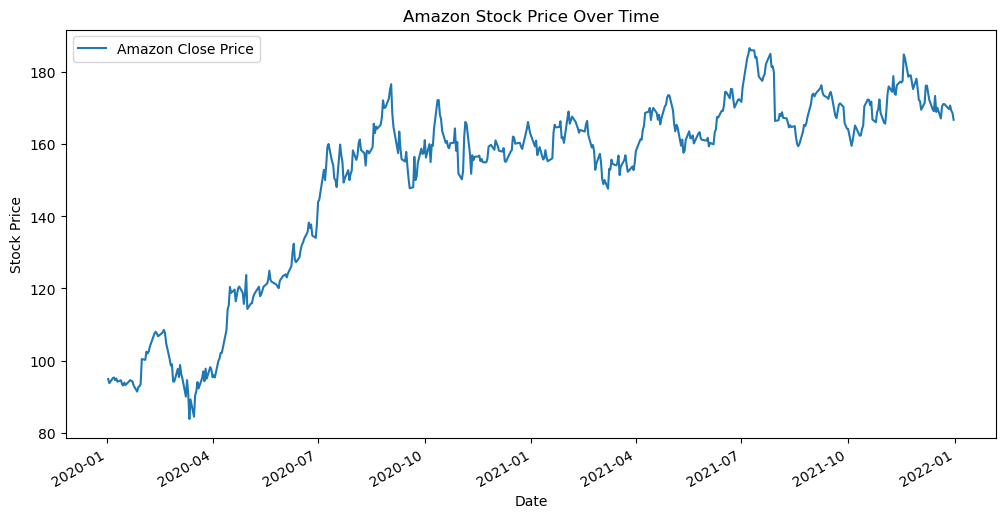

Amazon's stock price over 2020-2022


In [18]:
# Task 3: Change in stock price over time
plt.figure(figsize=(12, 6))
amazon_data['Close'].plot(label='Amazon Close Price')
plt.title('Amazon Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
print("Amazon's stock price over 2020-2022")

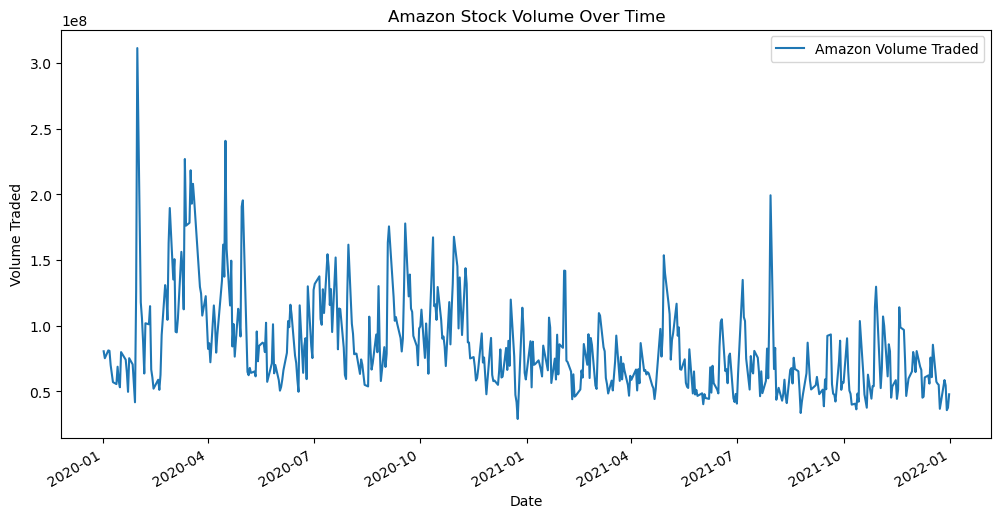

Fluctuations in trading volume for Amazon stock.


In [19]:
# Task 4: Visualize the change in a stock’s volume being traded over time
plt.figure(figsize=(12, 6))
amazon_data['Volume'].plot(label='Amazon Volume Traded')
plt.title('Amazon Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume Traded')
plt.legend()
plt.show()
print("Fluctuations in trading volume for Amazon stock.")

<Figure size 1200x600 with 0 Axes>

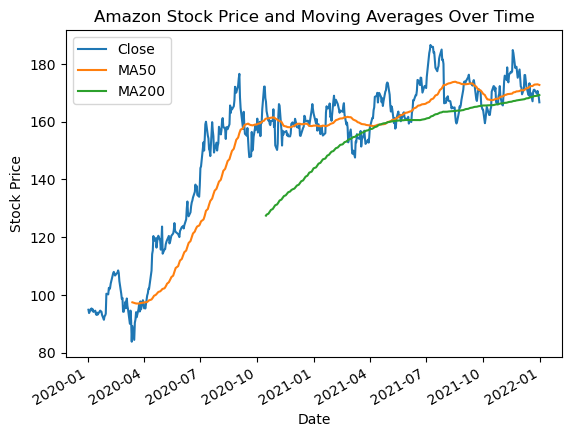

The moving averages (50-day and 200-day) help in identifying trends and smoothing price fluctuations.


In [25]:
# Task 5: Moving average of the stock
amazon_data['MA50'] = amazon_data['Close'].rolling(window=50).mean()
amazon_data['MA200'] = amazon_data['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
amazon_data[['Close', 'MA50', 'MA200']].plot(label=['Amazon Close Price', '50-Day MA', '200-Day MA'])
plt.title('Amazon Stock Price and Moving Averages Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
print("The moving averages (50-day and 200-day) help in identifying trends and smoothing price fluctuations.")

In [21]:
# Task 6: Daily return average of the stock
amazon_data['Daily Return'] = amazon_data['Close'].pct_change()

# Calculate metrics for daily returns
avg_daily_return = amazon_data['Daily Return'].mean()
std_dev_daily_return = amazon_data['Daily Return'].std()
annualized_volatility = std_dev_daily_return * np.sqrt(252) # Assuming 252 trading days in a year
avg_daily_return

0.0013228189135162589

In [22]:
std_dev_daily_return

0.020245198162913463

In [23]:
annualized_volatility

0.32138255749374445

In [24]:
# Task 7: Add a new column 'Trend'
amazon_data['Trend'] = np.where(amazon_data['Daily Return'] > 0, 'Up', 'Down')
amazon_data.head()

,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,Daily Return,Trend
Date,,,,,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000,NaN,NaN,NaN,Down
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000,NaN,NaN,-0.012139,Down
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000,NaN,NaN,0.014886,Up
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000,NaN,NaN,0.002092,Up
2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000,NaN,NaN,-0.007809,Down


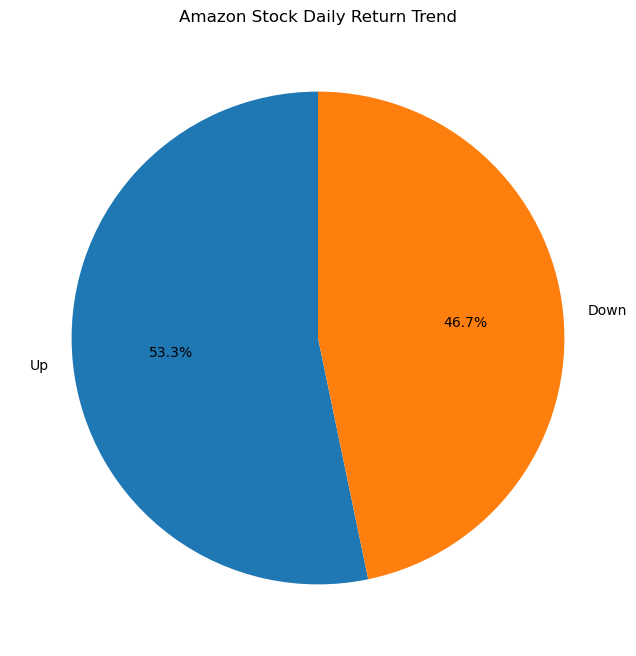

The pie chart provides an overview of the distribution of daily return trends (Up/Down).


In [26]:
# Task 8: Visualize trend frequency through a Pie Chart
trend_counts = amazon_data['Trend'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Amazon Stock Daily Return Trend')
plt.show()
print("The pie chart provides an overview of the distribution of daily return trends (Up/Down).")

[*********************100%%**********************]  3 of 3 completed


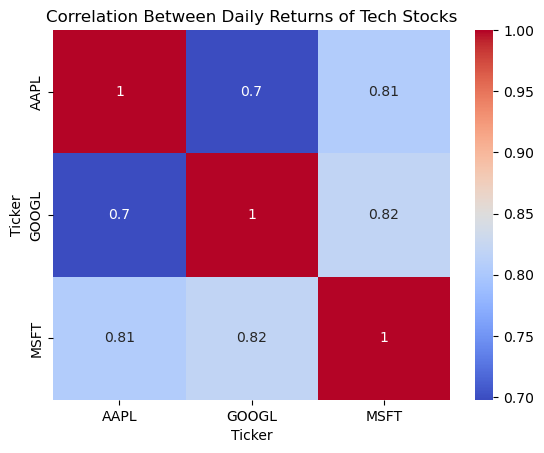

Inference: The heatmap shows the correlation between daily returns of Apple, Google, and Microsoft stocks.

Quantitative Analysis:
Average Daily Return: 0.0013
Standard Deviation of Daily Return: 0.0202
Annualized Volatility: 0.3214
Analysis: On average, the stock has positive daily returns, indicating a generally upward trend.


In [17]:
# Task 9: Correlation between the daily returns of different stocks
tech_stocks = yf.download(['AAPL', 'GOOGL', 'MSFT'], start='2020-01-01', end='2022-01-01')['Close']
daily_returns = tech_stocks.pct_change()

correlation_matrix = daily_returns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Daily Returns of Tech Stocks')
plt.show()
print("Inference: The heatmap shows the correlation between daily returns of Apple, Google, and Microsoft stocks.")

# Print quantitative metrics and analysis
print("\nQuantitative Analysis:")
print(f"Average Daily Return: {avg_daily_return:.4f}")
print(f"Standard Deviation of Daily Return: {std_dev_daily_return:.4f}")
print(f"Annualized Volatility: {annualized_volatility:.4f}")

# Additional Analysis
if avg_daily_return > 0:
    print("Analysis: On average, the stock has positive daily returns, indicating a generally upward trend.")
else:
    print("Analysis: On average, the stock has negative daily returns, indicating a generally downward trend.")
